# Article takeaway:
- I read the Feature Engineering strategies for credit card fraud detection
- While it is common to use metrics such as the ROC/AUC to determine whether fraud has occurred it may not be the best measure, at least not for fraud detection instances because as the article speaks to it assumes "that misclassification errors carry the same cost, similarly with the correct classified transactions" and this is not the case; it would be better to utilize the modified cost matrix instead, for example
- The article states that "The objective, is to be able to detect very dissimilar continuous transactions within the purchases of a customer." But these features don't capture the customer's behavior, only the latest purchase can do this 
- aggregating transaction data to create variables that capture the behavior of customers has to be done with the understanding that the value of the information used in the aggregation may "diminish in value" as time goes on and new transactions occur so they constantly need to be in consideration of this 
- You cannot use the standard mean that we use in descriptive statistics, for example, when trying to aggregate time because it doesn't allow for us to account for the sporadic behavioral choices made by customers 

In [1]:
setwd("C:/Users/rdiml/Documents/")
ccard.data <- read.csv(file = 'purchase_credit_card.csv')

In [2]:
install.packages('plotly')
install.packages('DataExplorer')
library(plotly)
library(DataExplorer)
library(tidyverse)
install.packages('dplyr')
library(dplyr)
library(ggplot2)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpcpItf0\downloaded_packages


Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpcpItf0\downloaded_packages


Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.3
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.3     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks plotly::filter(), stats::filter()
x dplyr::lag()    masks stats::lag()
Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"

In [3]:
dim(ccard.data)
summary(ccard.data)
colnames(ccard.data)

[1] 442458     11

   Year.Month     Agency.Number  
 Min.   :201307   Min.   : 1000  
 1st Qu.:201309   1st Qu.: 1000  
 Median :201401   Median :47700  
 Mean   :201357   Mean   :42786  
 3rd Qu.:201404   3rd Qu.:76000  
 Max.   :201406   Max.   :98000  
                                 
                                Agency.Name    
 OKLAHOMA STATE UNIVERSITY            :115995  
 UNIVERSITY OF OKLAHOMA               : 76143  
 UNIV. OF OKLA. HEALTH SCIENCES CENTER: 58247  
 DEPARTMENT OF CORRECTIONS            : 22322  
 DEPARTMENT OF TOURISM AND RECREATION : 17232  
 DEPARTMENT OF TRANSPORTATION         : 15689  
 (Other)                              :136830  
               Cardholder.Last.Name Cardholder.First.Initial
 JOURNEY HOUSE TRAVEL INC: 10137    J      : 55031          
 UNIVERSITY AMERICAN     :  7219    G      : 42251          
 JOURNEY HOUSE TRAVEL    :  4693    D      : 38120          
 Heusel                  :  4212    M      : 35352          
 Hines                   :  3423    S  

[1] "Year.Month"                   "Agency.Number"               
 [3] "Agency.Name"                  "Cardholder.Last.Name"        
 [5] "Cardholder.First.Initial"     "Description"                 
 [7] "Amount"                       "Vendor"                      
 [9] "Transaction.Date"             "Posted.Date"                 
[11] "Merchant.Category.Code..MCC."

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
442458,11,8,3,0,0,442458,4867038,38060936


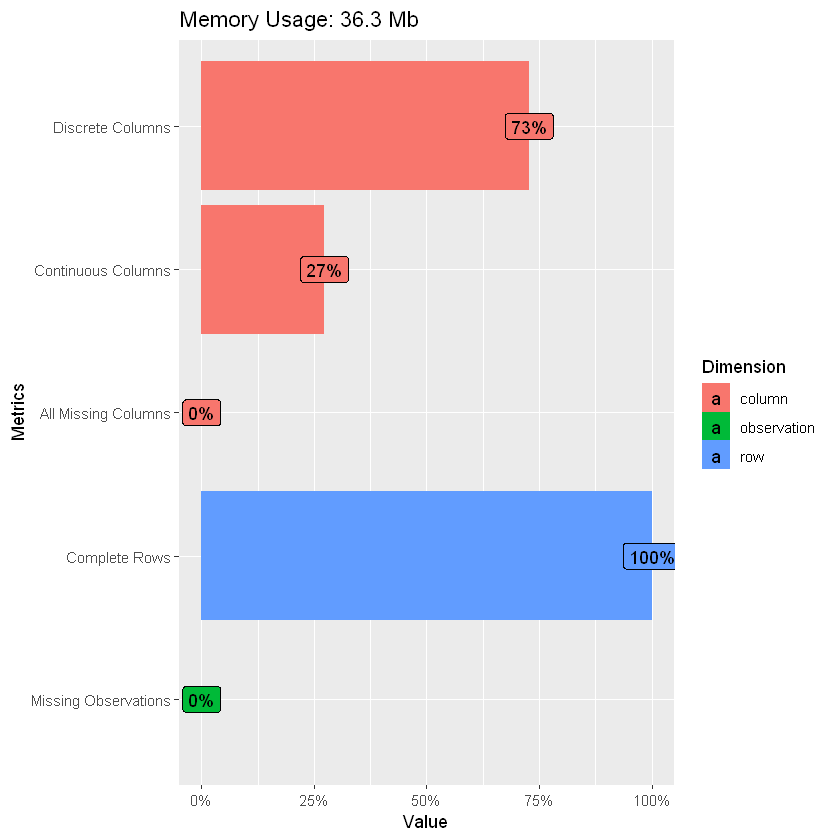

In [4]:
introduce(ccard.data)
plot_intro(ccard.data)

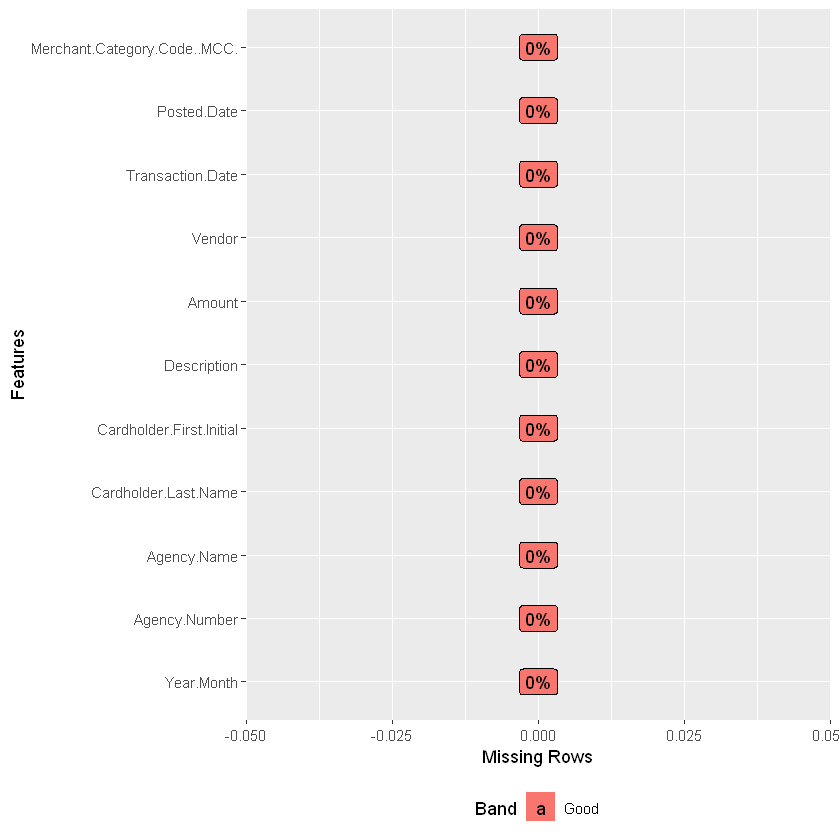

In [5]:
plot_missing(ccard.data)

In [6]:
head(ccard.data)

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,Merchant.Category.Code..MCC.
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"


In [7]:
tail(ccard.data)

,Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,Merchant.Category.Code..MCC.
442453,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,FUEL PUMP EA|FUEL PUMP GASKET EA|CLAMP 5 EA|COLLAR,189.13,WHITE STAR MACHINERY,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED"
442454,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES
442455,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY"
442456,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED
442457,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,06/19/2014 12:00:00 AM,06/23/2014 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED
442458,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,4714.07,WARRENCAT CREDIT DEPT,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,MISCELLANEOUS AND SPECIALTY RETAIL STORES


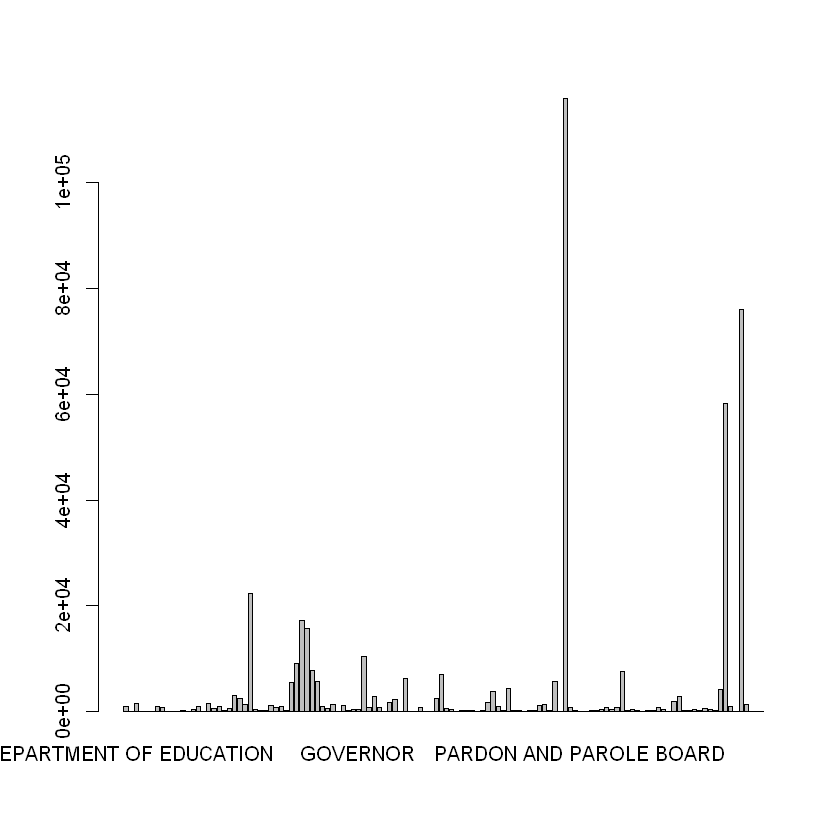

In [8]:
plot(ccard.data$Agency.Name)

In [9]:
ccard.data %>% group_by(Agency.Name) %>% summarise(ct = n()) %>% arrange(desc(ct))

Agency.Name,ct
OKLAHOMA STATE UNIVERSITY,115995
UNIVERSITY OF OKLAHOMA,76143
UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247
DEPARTMENT OF CORRECTIONS,22322
DEPARTMENT OF TOURISM AND RECREATION,17232
DEPARTMENT OF TRANSPORTATION,15689
GRAND RIVER DAM AUTH.,10427
DEPARTMENT OF REHABILITATION SERVICES,9162
DEPARTMENT OF VETERANS AFFAIRS,7708
S. W. OKLA. ST. UNIV.,7488


Over half of the credit card charges are labeled as general purpose. The combination of 'AIR TRAVEL' and 'ROOM CHARGES' account for nearly another 50k of charges. Beyond them it seems to be a small distribution among charges so I am going to have to check what they correlate to so that I have an idea for how to categorize them later on 

In [10]:
ccard.data %>% group_by(Description) %>% summarise(ct = n()) %>% arrange(desc(ct))

Description,ct
GENERAL PURCHASE,247187
AIR TRAVEL,29584
ROOM CHARGES,18120
AT&T SERVICE PAYMENT ITM,2657
001 Priority 1LB PCE,2005
000000000000000000000000,1828
PRODUCTS AND SERVICES EA,1264
SHIPPING CHARGES,1210
001 Standard 1LB PCE,738
JANITORIAL SUPPLIES NMB,641


With this one, I wanted to see if there was an amount that was consistently appearing, and the most frequent charges are for small ones which was expected. However, there are a number of extremely high values in the dataset so I am going to have investigate these charges to see what they correspond to. 

In [11]:
ccard.data %>% group_by(Amount) %>% summarise(ct = n()) %>% arrange(desc(ct))

Amount,ct
20.00,11743
25.00,6530
30.00,2059
83.00,1999
50.00,1395
100.00,1303
4.75,1246
77.00,1086
34.00,940
29.00,934


This allows me to dig into those outlier type of charge amounts further. A number of them correspond to 'GENERAL PURPORSE' again, so this view alone is not enough to determine what kind of charges these are. For these charges I'll need to view the vendor and merchant category code in combination to get a better understanding of them. 

## Charge Amount investigation (130,000+)

In [15]:
ccard.data %>% filter(Amount > 130000)

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,Merchant.Category.Code..MCC.
201401,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,GENERAL PURCHASE,183367.9,CONSTRUCTION DIVISION,01/28/2014 12:00:00 AM,01/29/2014 12:00:00 AM,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED
201308,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,77000,7,GENERAL PURCHASE,1750380.0,PAYMENT ADJUSTMENT,07/19/2013 12:00:00 AM,08/05/2013 12:00:00 AM,OTHER FEES
201309,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,77000,7,GENERAL PURCHASE,1903858.4,PAYMENT ADJUSTMENT,08/21/2013 12:00:00 AM,09/12/2013 12:00:00 AM,OTHER FEES
201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,GENERAL PURCHASE,343148.5,PAYMENT ADJUSTMENT,06/13/2013 12:00:00 AM,07/03/2013 12:00:00 AM,OTHER FEES
201308,98000,GRAND RIVER DAM AUTH.,Cardholder,e,Product and/or Services Each,151341.6,FISHNET SECURITY,08/14/2013 12:00:00 AM,08/16/2013 12:00:00 AM,"DETECTIVE AGENCIES,PROTECTIVE AGENCIES,AND SECURITY SERVICES"
201309,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,345176.0,"MOTOROLA, INC. - ONLINE",09/24/2013 12:00:00 AM,09/26/2013 12:00:00 AM,TELECOMMUNICATION EQUIPMENT AND TELEPHONE SALES
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,Product and/or Services EA,143920.0,FISHNET SECURITY,10/22/2013 12:00:00 AM,10/24/2013 12:00:00 AM,"DETECTIVE AGENCIES,PROTECTIVE AGENCIES,AND SECURITY SERVICES"
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,814934.8,EMC CORPORATION,10/03/2013 12:00:00 AM,10/07/2013 12:00:00 AM,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE"
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,403490.8,EMC CORPORATION,10/15/2013 12:00:00 AM,10/17/2013 12:00:00 AM,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE"
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,1089180.0,PELCO STRUCTURAL LLC,10/25/2013 12:00:00 AM,10/28/2013 12:00:00 AM,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED"


In [22]:
ccard.data %>% filter(Amount > 130000 | Description == 'GENERAL PURPOSE') %>% 
select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201401,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,183367.9,CONSTRUCTION DIVISION,01/28/2014 12:00:00 AM
201308,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,77000,7,1750380.0,PAYMENT ADJUSTMENT,07/19/2013 12:00:00 AM
201309,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,77000,7,1903858.4,PAYMENT ADJUSTMENT,08/21/2013 12:00:00 AM
201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,343148.5,PAYMENT ADJUSTMENT,06/13/2013 12:00:00 AM
201308,98000,GRAND RIVER DAM AUTH.,Cardholder,e,151341.6,FISHNET SECURITY,08/14/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Cardholder,e,345176.0,"MOTOROLA, INC. - ONLINE",09/24/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,143920.0,FISHNET SECURITY,10/22/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,814934.8,EMC CORPORATION,10/03/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,403490.8,EMC CORPORATION,10/15/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,1089180.0,PELCO STRUCTURAL LLC,10/25/2013 12:00:00 AM


In [21]:
ccard.data %>% filter(Amount > 130000 | Description == 'GENERAL PURPOSE') %>% 
summarise(avg = mean(Amount), min = min(Amount),  max = max(Amount))

avg,min,max
408784.8,131658.8,1903858


High Amount charges:
- It looks like a number of these payments correspond to Manufacturering equipment, materials (i.e. chemicals), and items relating to computing and general contractors. 
- The main takeaway from here is that these aren't instances of fraud or something malicious, but rather that they are real charges with incomplete data. Becuase the names being associated with the charges are (1)'Cardholer' and 'e', (2) 'Johnson' and 'c' or (3) completely numeric '77000' '7'. 
- With the numeric instances it appears to indicate a miss in the data compiling process because the last name of the "cardholder" is the same value as the Agency.Number. I waddill followup further to see if there are additional rows where there is this issue that the Agency.Number and Cardholder.Last.Name are the same 
- As for the 'Cardholer' and 'e' ones they correspond to the same Agency.Number each time which is 98000, but the Agency.Name is 'GRAD RIVER DAM AUTH.' so it indicates that maybe there is no dedicated cardholder and it maybe its just a corporate account with no individual attached to it; I'm not sure if this is possible so I'll do some external research
- While I work under the assumption that its possible to not have a person tied to a credit card charge if it is a corporate account it does require that I ask why 'Hunter' 'G' created a charge for the 'GRAD RIVER DAM AUTH.' with a telecommunications company for "132,000"
- For the 'GRAD RIVER DAM AUTH.' it looks they are making monthly charges with for what seems like an ongoing construction project during the first week of each month
- The DEPARTMENT OF TRANSPORTATION charges look like they are purchasing additional stock from a salt mining company ('NORTH AMERICAN SALT CO')
- For the UNIV OF OKLA. HEALTH... it looks like the charges are done by some kind of coded system such as academic or departmental so that is why there is no name; will check the other charges to see if they do use that for deparments or if they just use that singular combo of 77000 7 for all of their charges


## Charge Amount investigation (>100k, 130k<)

In [29]:
ccard.data %>% filter(Amount > 100000 & Amount < 130000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201308,76000,UNIVERSITY OF OKLAHOMA,CANTRELL,P,114203.2,EMBASSY SUITES NORMAN,08/08/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Hunter,G,107598.6,PI PRESIDIO,09/10/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Hunter,G,104500.0,SHI CORP,09/24/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,115852.0,SIEMENS POWER GENERATIO,10/17/2013 12:00:00 AM
201402,34500,DEPARTMENT OF TRANSPORTATION,Gadberry,P,123685.8,DUB ROSS COMPANY INC,02/25/2014 12:00:00 AM
201402,76000,UNIVERSITY OF OKLAHOMA,JOHNSON,L,103101.6,LEICA MICROSYSTEMS,02/07/2014 12:00:00 AM
201403,98000,GRAND RIVER DAM AUTH.,Cardholder,e,104998.3,FLETCHER REINHARDT CO,03/18/2014 12:00:00 AM
201405,98000,GRAND RIVER DAM AUTH.,Cardholder,e,112457.6,FLETCHER REINHARDT CO,05/09/2014 12:00:00 AM
201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,102869.9,FLETCHER REINHARDT CO,06/04/2014 12:00:00 AM


Greater then 100k & less than 100k:
- Charges are mostly stemming from the GRAND RIVER DAM AUTH. again, except this time they are being attributed to 'Cardholder' 'e' and in two instances 'Hunter' 'G' 
- The FLETCHER REINHARDT CO is a maintenance company so it seems that there has been a lot of maintenance work down for the damn authorithy within the dataset for significant amounts of money
- The UNIVERSITY OF OKLA. bought a little over a 100k on scientific research equipment with LEICA MICROSYSTEMS; while they also appeared to pay a hefty bill to a hotel company in EMBASSY SUITES NORMAN
- The DEPARTMENT OF TRANSPORTATION paid for construction work this time in the DUB ROSS COMPANY vendor charge

## Charge Amount investigation (>80k, 100k<)

In [30]:
ccard.data %>% filter(Amount > 80000 & Amount < 100000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,80146.87,APAC CENTRAL OFFICE,09/24/2013 12:00:00 AM
201308,13100,DEPARTMENT OF CORRECTIONS,Bowlin,C,96190.38,WW GRAINGER,08/28/2013 12:00:00 AM
201401,34500,DEPARTMENT OF TRANSPORTATION,Lyons,B,96755.02,SOUTHWEST TRAILERS & EQUI,01/14/2014 12:00:00 AM
201308,35000,HISTORICAL SOCIETY,CHADBOURNE,K,90108.00,COMPSOURCE OKLAHOMA,08/14/2013 12:00:00 AM
201307,98000,GRAND RIVER DAM AUTH.,Cardholder,e,99999.00,ALCATEL-LUC ENTERPRIS,07/25/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Cardholder,e,90000.00,PERFECTION EQUIPMENT,09/20/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Cardholder,e,90000.00,PERFECTION EQUIPMENT,09/20/2013 12:00:00 AM
201309,98000,GRAND RIVER DAM AUTH.,Cardholder,e,90849.00,TURNER ELECTRIC CORPORATI,09/13/2013 12:00:00 AM
201310,98000,GRAND RIVER DAM AUTH.,Cardholder,e,90340.80,FAIRPOINT COMM. 80,10/10/2013 12:00:00 AM
201312,98000,GRAND RIVER DAM AUTH.,Cardholder,e,99000.00,TECHLINE INC,12/10/2013 12:00:00 AM


## Charge Amount investigation (>60k, 80k<)

In [31]:
ccard.data %>% filter(Amount > 60000 & Amount < 80000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201308,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,64600.51,APAC CENTRAL OFFICE,08/28/2013 12:00:00 AM
201308,2500,OKLAHOMA MILITARY DEPARTMENT,CALDWELL,T,62102.40,DMI DELL K-12/GOVT,08/16/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,67002.82,APAC CENTRAL OFFICE,09/24/2013 12:00:00 AM
201312,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Ward,E,61214.48,SIMPLEX GRINNELL WEB P,12/18/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,61160.20,GEXPRO,07/10/2013 12:00:00 AM
201308,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,75393.94,JD C&F CO DIRECT SALES,08/06/2013 12:00:00 AM
201307,34000,STATE DEPARTMENT OF HEALTH,Moreau,M,74188.50,MCKESSON MEDICAL SUPPLY,07/18/2013 12:00:00 AM
201307,34000,STATE DEPARTMENT OF HEALTH,Moreau,M,74188.50,MCKESSON MEDICAL SUPPLY,07/18/2013 12:00:00 AM
201312,34000,STATE DEPARTMENT OF HEALTH,Amend,S,79458.00,DMI DELL K-12/GOVT,12/04/2013 12:00:00 AM
201310,34500,DEPARTMENT OF TRANSPORTATION,Lewis,G,63500.00,ACTION SAFETY SUPPLY,10/28/2013 12:00:00 AM


In [33]:
ccard.data %>% filter(Amount > 50000 & Amount < 60000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,58092.00,MARVIN'S MOWERS & OUTDOO,09/12/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,57802.06,APAC CENTRAL OFFICE,09/10/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,53800.00,QUALITY FENCE CO INC J C,09/19/2013 12:00:00 AM
201401,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,52459.89,CONSTRUCTION DIVISION,01/28/2014 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Jenkins,G,50646.69,SYSCO RESOURCES SERVICES,07/19/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Romero,M,50288.80,PATTERSON DENTAL SUPPL,07/08/2013 12:00:00 AM
201310,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,55000.00,WW GRAINGER,10/16/2013 12:00:00 AM
201312,27000,STATE ELECTION BOARD,Smith-Morton,B,58875.00,SUNSHINE INDUSTRIES INC,12/19/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Richardson,S,55330.99,SOUTHEAST OKC LANDFILL,07/15/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Wise,V,56271.62,"HALL MANUFACTURING, LLC",07/26/2013 12:00:00 AM


In [35]:
ccard.data %>% filter(Amount > 45000 & Amount < 50000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,45093.10,WW GRAINGER,06/27/2013 12:00:00 AM
201310,13100,DEPARTMENT OF CORRECTIONS,Bowlin,C,46209.00,SOUTH CENTRAL INDUSTRIES,10/10/2013 12:00:00 AM
201308,34000,STATE DEPARTMENT OF HEALTH,Moreau,M,49200.00,MCKESSON MEDICAL SUPPLY,08/01/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Branam,P,49680.00,CPS 9611 TIMBERLAND GRP,07/16/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,HUENERGARDT,S,47304.42,OREILLY AUTO 00003145,08/16/2013 12:00:00 AM
201312,34500,DEPARTMENT OF TRANSPORTATION,McElroy,P,49000.00,MIDSTATE TRAFFIC CONTROL,12/04/2013 12:00:00 AM
201310,47700,OKLA. BUREAU OF NARCOTICS AND DANGEROUS,Gomez,K,47930.16,DMI DELL K-12/GOVT,10/02/2013 12:00:00 AM
201310,56600,DEPARTMENT OF TOURISM AND RECREATION,McCall,C,49403.62,C & CE,10/07/2013 12:00:00 AM
201312,76000,UNIVERSITY OF OKLAHOMA,CANTRELL,P,45901.24,OMNI HOUSTON,12/03/2013 12:00:00 AM
201312,76000,UNIVERSITY OF OKLAHOMA,LARSON,B,45066.00,FEDERAL COPRORATION,12/19/2013 12:00:00 AM


In [36]:
ccard.data %>% filter(Amount > 40000 & Amount < 45000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,42047.54,APAC CENTRAL OFFICE,09/16/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,44678.00,QUALITY FENCE CO INC J C,09/09/2013 12:00:00 AM
201312,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Edwards,D,43974.37,SIMPLEX GRINNELL WEB P,12/03/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,Lewis,G,44212.50,XCESSORIES SQUARED DEVELO,08/12/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,HUENERGARDT,S,40740.00,BG PRODUCTS INC,07/31/2013 12:00:00 AM
201310,34500,DEPARTMENT OF TRANSPORTATION,McElroy,P,42215.50,MANDEL METALS,10/22/2013 12:00:00 AM
201310,34500,DEPARTMENT OF TRANSPORTATION,McElroy,P,40680.00,3MStPau SS34907 14-TE-,10/15/2013 12:00:00 AM
201311,34500,DEPARTMENT OF TRANSPORTATION,HUENERGARDT,S,40638.96,OREILLY AUTO 00003145,11/13/2013 12:00:00 AM
201311,34500,DEPARTMENT OF TRANSPORTATION,Lyons,B,42180.00,"HALL MANUFACTURING, LLC",11/26/2013 12:00:00 AM
201312,34500,DEPARTMENT OF TRANSPORTATION,Gadberry,P,44600.00,HERTZ EQUIPMENT,12/13/2013 12:00:00 AM


In [37]:
ccard.data %>% filter(Amount > 35000 & Amount < 40000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,39333.00,QUALITY FENCE CO INC J C,09/19/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,Wise,V,38802.81,WARREN CAT OKC TRUCK,08/15/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,HUENERGARDT,S,38946.23,"HALL MANUFACTURING, LLC",08/08/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,Gadberry,P,38089.36,SOUTHERN TIRE MART#45,08/21/2013 12:00:00 AM
201310,34500,DEPARTMENT OF TRANSPORTATION,Lewis,G,38835.00,FENSCO INC,10/01/2013 12:00:00 AM
201401,34500,DEPARTMENT OF TRANSPORTATION,BUSHNELL,N,37991.40,KENNAMETAL INC,01/23/2014 12:00:00 AM
201401,47700,OKLA. BUREAU OF NARCOTICS AND DANGEROUS,Gomez,K,37698.00,FORD AUDIO VIDEO-OK CIT,01/23/2014 12:00:00 AM
201401,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,38815.00,PROQUEST,01/22/2014 12:00:00 AM
201307,76000,UNIVERSITY OF OKLAHOMA,CANTRELL,P,35076.54,COX OKLAHOMA COMM SV,07/12/2013 12:00:00 AM
201308,76000,UNIVERSITY OF OKLAHOMA,CANTRELL,P,37548.59,COX OKLAHOMA COMM SV,08/20/2013 12:00:00 AM


In [38]:
ccard.data %>% filter(Amount > 30000 & Amount < 35000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201308,2500,OKLAHOMA MILITARY DEPARTMENT,STIERWALT,C,31647.69,SYSCO RESOURCES SERVICES,08/14/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,33839.03,APAC CENTRAL OFFICE,09/10/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,32402.00,QUALITY FENCE CO INC J C,09/19/2013 12:00:00 AM
201309,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,34171.92,CENTRAL OKLAHOMAWINLSN,09/10/2013 12:00:00 AM
201310,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,31410.00,GEXPRO,10/18/2013 12:00:00 AM
201401,13100,DEPARTMENT OF CORRECTIONS,Leistner,D,34911.36,DMI DELL K-12/GOVT,01/16/2014 12:00:00 AM
201401,13100,DEPARTMENT OF CORRECTIONS,Leistner,D,34911.36,DMI DELL K-12/GOVT,01/18/2014 12:00:00 AM
201307,34000,STATE DEPARTMENT OF HEALTH,Moreau,M,30725.00,MCKESSON MEDICAL SUPPLY,07/18/2013 12:00:00 AM
201309,34500,DEPARTMENT OF TRANSPORTATION,Lewis,G,30076.45,ROBERTS TRUCK CENTER,09/26/2013 12:00:00 AM
201310,34500,DEPARTMENT OF TRANSPORTATION,Branam,P,30677.14,"HALL MANUFACTURING, LLC",10/14/2013 12:00:00 AM


In [39]:
ccard.data %>% filter(Amount > 25000 & Amount < 30000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,27967.38,MAGDALENE COLLEGE,09/11/2013 12:00:00 AM
201307,2500,OKLAHOMA MILITARY DEPARTMENT,CALDWELL,T,27317.64,DMI DELL K-12/GOVT,07/01/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,STIERWALT,C,25936.92,SYSCO RESOURCES SERVICES,09/09/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Jenkins,G,28245.84,SYSCO RESOURCES SERVICES,07/19/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,25185.60,WW GRAINGER,06/27/2013 12:00:00 AM
201311,13100,DEPARTMENT OF CORRECTIONS,Jenkins,G,25528.02,WW GRAINGER,11/21/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Gadberry,P,25800.00,BG PRODUCTS INC,07/18/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Richardson,S,28379.50,DISTRICT 5012 - OKC LA,07/17/2013 12:00:00 AM
201307,34500,DEPARTMENT OF TRANSPORTATION,Richardson,S,29076.11,SOUTHEAST OKC LANDFILL,07/16/2013 12:00:00 AM
201308,34500,DEPARTMENT OF TRANSPORTATION,BUSHNELL,N,29285.98,APAC CENTRAL 04053,08/01/2013 12:00:00 AM


In [40]:
ccard.data %>% filter(Amount > 20000 & Amount < 25000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,22500.00,"GRISSOMS, LLC (MUSKOGEE)",09/12/2013 12:00:00 AM
201310,2500,OKLAHOMA MILITARY DEPARTMENT,STIERWALT,C,22531.89,SYSCO RESOURCES SERVICES,10/15/2013 12:00:00 AM
201312,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,20694.00,CONSTRUCTION DIVISION,12/05/2013 12:00:00 AM
201311,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Edwards,D,23135.52,SIMPLEX GRINNELL WEB P,11/13/2013 12:00:00 AM
201312,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Edwards,D,20989.56,SIMPLEX GRINNELL WEB P,12/17/2013 12:00:00 AM
201401,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Bussard,R,23012.13,OKC UTILITY SERVICEWEB S,01/22/2014 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,20223.88,SOUTH CENTRAL INDUSTRIES,07/19/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,22453.94,PI PRESIDIO,07/11/2013 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,20040.00,WW GRAINGER,07/05/2013 12:00:00 AM
201308,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,22497.30,GALLS/QUARTERMASTER,08/13/2013 12:00:00 AM


In [41]:
ccard.data %>% filter(Amount > 15000 & Amount < 20000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201307,1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,15120.00,BETHESDA COURT HOTEL,05/16/2013 12:00:00 AM
201312,1000,OKLAHOMA STATE UNIVERSITY,Stover,C,15931.16,INTERCONTINENTAL HOTEL SA,12/24/2013 12:00:00 AM
201312,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,15427.50,CONSTRUCTION DIVISION,12/04/2013 12:00:00 AM
201401,2500,OKLAHOMA MILITARY DEPARTMENT,STIERWALT,C,16135.94,SYSCO RESOURCES SERVICES,01/13/2014 12:00:00 AM
201310,4000,DEPARTMENT OF AGRICULTURE,Broiles,M,15158.47,ATT BILL PAYMENT,10/23/2013 12:00:00 AM
201307,4900,ATTORNEY GENERAL,Baustert,J,15223.30,IBM SWG 9725558,06/28/2013 12:00:00 AM
201309,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Bussard,R,15228.35,OKC UTILITY SERVICEWEB S,09/24/2013 12:00:00 AM
201309,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Bussard,R,15656.26,OKC UTILITY SERVICEWEB S,09/24/2013 12:00:00 AM
201401,9000,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,Bussard,R,18007.17,OKC UTILITY SERVICEWEB S,01/17/2014 12:00:00 AM
201307,13100,DEPARTMENT OF CORRECTIONS,Saltzman,D,19256.00,REDWOOD TOXICOLOGY,06/27/2013 12:00:00 AM


In [42]:
ccard.data %>% filter(Amount > 10000 & Amount < 15000 | Description == 'GENERAL PURPOSE') %>% select('Year.Month', 'Agency.Number','Agency.Name','Cardholder.Last.Name','Cardholder.First.Initial','Amount','Vendor','Transaction.Date')

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Amount,Vendor,Transaction.Date
201308,1000,OKLAHOMA STATE UNIVERSITY,Clark,C,12413.99,PLATINUM MECHANICAL,08/14/2013 12:00:00 AM
201401,1000,OKLAHOMA STATE UNIVERSITY,Clark,C,12600.00,TLC PAINTING,01/24/2014 12:00:00 AM
201308,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,14523.00,MARVIN'S MOWERS & OUTDOO,08/20/2013 12:00:00 AM
201309,2500,OKLAHOMA MILITARY DEPARTMENT,MCCALL,L,12846.43,YELLOWHOUSE MACHINERY CO-,09/24/2013 12:00:00 AM
201311,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,13717.06,CONSTRUCTION DIVISION,11/13/2013 12:00:00 AM
201311,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,10846.78,CONSTRUCTION DIVISION,11/13/2013 12:00:00 AM
201311,2500,OKLAHOMA MILITARY DEPARTMENT,WALDROP,L,12324.00,LOWES #02574,11/12/2013 12:00:00 AM
201312,2500,OKLAHOMA MILITARY DEPARTMENT,MALLOY,J,13821.91,CONSTRUCTION DIVISION,12/04/2013 12:00:00 AM
201401,2500,OKLAHOMA MILITARY DEPARTMENT,STIERWALT,C,13724.57,SYSCO RESOURCES SERVICES,01/14/2014 12:00:00 AM
201309,4000,DEPARTMENT OF AGRICULTURE,Kontas,C,14399.20,FISHER SCI ATL,09/14/2013 12:00:00 AM


Main takeaway's:
- That if the charge amount exceeds a couple thousand dollars it is most likely a company or organization charge as opposed to an individual

## Checking the count of charges per combination of Last.Name/First.Initial

In [27]:
ccard.data %>% group_by(Cardholder.Last.Name, Cardholder.First.Initial) %>% summarise(ct = n()) %>% arrange(desc(ct))

Cardholder.Last.Name,Cardholder.First.Initial,ct
JOURNEY HOUSE TRAVEL INC,G,10137
UNIVERSITY AMERICAN,G,7219
JOURNEY HOUSE TRAVEL,G,4693
Heusel,J,4212
Hines,G,3309
Bowers,R,2448
Tornakian,M,2267
MCDOWELL,K,2112
HANNAH,A,1961
Stroup,P,1939


In [49]:
#column one 
#creating a combination column between the last name and the first initial to set up additional columns
ccard.data$Name.combo <- paste(ccard.data$Cardholder.Last.Name, ccard.data$Cardholder.First.Initial)
head(ccard.data)

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,Merchant.Category.Code..MCC.,Name.combo
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,Mason C
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,Mason C
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,Massey J
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",Massey T
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",Mauro-Herrera M
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",Mauro-Herrera M


In [52]:
table(ccard.data$Name.combo)


                   15000 1                    24100 2 
                         1                         10 
                   42000 4                    44600 4 
                        16                          1 
                   48000 4                    53000 5 
                        13                          1 
                   53100 5                    60500 6 
                         6                          2 
                   75000 7                    77000 7 
                         2                          6 
                   81500 8                    88000 8 
                         2                          2 
                   98000 9                    AARON B 
                         4                          3 
                  Abbott M                   Abbott T 
                        42                        113 
               Abdolvand R                Abernathy M 
                        25                         49 
         

In [59]:
install.packages('caret')
library(caret)
install.packages('fastDummies')
library(fastDummies)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpcpItf0\downloaded_packages


## Dummy variables for Merchant Category 

In [62]:
dum.vars <- dummy_cols(ccard.data, select_columns = c('Merchant.Category.Code..MCC.'))

In [69]:
dum.vars[,11:25]

Merchant.Category.Code..MCC.,Name.combo,Merchant.Category.Code..MCC._,"Merchant.Category.Code..MCC._ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",Merchant.Category.Code..MCC._ADVANTAGE RENT A CAR,Merchant.Category.Code..MCC._ADVERTISING SERVICES,Merchant.Category.Code..MCC._AER LINGUS,Merchant.Category.Code..MCC._AEROLINEAS ARGENTINAS,Merchant.Category.Code..MCC._AEROMEXICO,Merchant.Category.Code..MCC._AGRICULTURAL COOPERATIVES,Merchant.Category.Code..MCC._AIR BERLIN,Merchant.Category.Code..MCC._AIR CANADA,Merchant.Category.Code..MCC._AIR CHINA,Merchant.Category.Code..MCC._AIR CONDITIONING AND REFRIGERATION REPAIR SHOPS,Merchant.Category.Code..MCC._AIR FRANCE
CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,Mason C,0,0,0,0,0,0,0,0,0,0,0,0,0
SHERATON,Mason C,0,0,0,0,0,0,0,0,0,0,0,0,0
DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,Massey J,0,0,0,0,0,0,0,0,0,0,0,0,0
"GROCERY STORES,AND SUPERMARKETS",Massey T,0,0,0,0,0,0,0,0,0,0,0,0,0
"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",Mauro-Herrera M,0,0,0,0,0,0,0,0,0,0,0,0,0
"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",Mauro-Herrera M,0,0,0,0,0,0,0,0,0,0,0,0,0
"GROCERY STORES,AND SUPERMARKETS",Mays B,0,0,0,0,0,0,0,0,0,0,0,0,0
FAST FOOD RESTAURANTS,Mays B,0,0,0,0,0,0,0,0,0,0,0,0,0
"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMERCIAL CLOTHING",McCarthy D,0,0,0,0,0,0,0,0,0,0,0,0,0
TELECOMMUNICATION SERVICES,McClurg L,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
colnames(dum.vars)

[1] "Year.Month"                                                                                
  [2] "Agency.Number"                                                                             
  [3] "Agency.Name"                                                                               
  [4] "Cardholder.Last.Name"                                                                      
  [5] "Cardholder.First.Initial"                                                                  
  [6] "Description"                                                                               
  [7] "Amount"                                                                                    
  [8] "Vendor"                                                                                    
  [9] "Transaction.Date"                                                                          
 [10] "Posted.Date"                                                                               
 [11] "Merchant.Category.Code..MCC."                                                              
 [12] "Name.combo"                                                                                
 [13] "Merchant.Category.Code..MCC._ "                                                            
 [14] "Merchant.Category.Code..MCC._ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES"                 
 [15] "Merchant.Category.Code..MCC._ADVANTAGE RENT A CAR"                                         
 [16] "Merchant.Category.Code..MCC._ADVERTISING SERVICES"                                         
 [17] "Merchant.Category.Code..MCC._AER LINGUS"                                                   
 [18] "Merchant.Category.Code..MCC._AEROLINEAS ARGENTINAS"                                        
 [19] "Merchant.Category.Code..MCC._AEROMEXICO"                                                   
 [20] "Merchant.Category.Code..MCC._AGRICULTURAL COOPERATIVES"                                    
 [21] "Merchant.Category.Code..MCC._AIR BERLIN"                                                   
 [22] "Merchant.Category.Code..MCC._AIR CANADA"                                                   
 [23] "Merchant.Category.Code..MCC._AIR CHINA"                                                    
 [24] "Merchant.Category.Code..MCC._AIR CONDITIONING AND REFRIGERATION REPAIR SHOPS"              
 [25] "Merchant.Category.Code..MCC._AIR FRANCE"                                                   
 [26] "Merchant.Category.Code..MCC._AIR INDIA"                                                    
 [27] "Merchant.Category.Code..MCC._AIR NEW ZEALAND LTD. INTERNATIONAL"                           
 [28] "Merchant.Category.Code..MCC._AIRLINES AND AIR CARRIERS"                                    
 [29] "Merchant.Category.Code..MCC._AIRPORTS,FLYING FIELDS,AND AIRPORT TERMINALS"                 
 [30] "Merchant.Category.Code..MCC._AIRTRAN AIRWAYS"                                              
 [31] "Merchant.Category.Code..MCC._ALAMO RENT-A-CAR"                                             
 [32] "Merchant.Category.Code..MCC._ALASKA AIRLINES INC."                                         
 [33] "Merchant.Category.Code..MCC._ALITALIA"                                                     
 [34] "Merchant.Category.Code..MCC._ALOFT HOTELS"                                                 
 [35] "Merchant.Category.Code..MCC._AMBULANCE SERVICES"                                           
 [36] "Merchant.Category.Code..MCC._AMERICAN AIRLINES"                                            
 [37] "Merchant.Category.Code..MCC._AMERICAS BEST VALUE INN"                                      
 [38] "Merchant.Category.Code..MCC._AMERICINN"                                                    
 [39] "Merchant.Category.Code..MCC._AMUSEMENT PRKS,CIRCUSES,CARNIVLS,AND FORTUNE TELLERS"         
 [40] "Merchant.Category.Code..MCC._ANTIQUE SHOPS"                                                
 [41] "Merchant.Category.Code..MCC._AQUARI

In [71]:
dum.vars %>% arrange(desc(Transaction.Date))

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,...,Merchant.Category.Code..MCC._WELDING SERVICES,Merchant.Category.Code..MCC._WESTIN HOTELS,Merchant.Category.Code..MCC._WESTJET AIRLINES,Merchant.Category.Code..MCC._WHOLESALE CLUBS,Merchant.Category.Code..MCC._WIG AND TOUPEE SHOPS,Merchant.Category.Code..MCC._WOMEN'S ACCESSORY AND SPECIALTY STORES,Merchant.Category.Code..MCC._WOMEN'S READY-TO-WEAR STORES,Merchant.Category.Code..MCC._WRECKING AND SALVAGE YARDS,Merchant.Category.Code..MCC._WYNDHAM HOTELS,Merchant.Category.Code..MCC._WYNN LAS VEGAS
201312,1000,OKLAHOMA STATE UNIVERSITY,Blakley,T,BEAD 2.0 DIA CHEM GLASS PK PK,21.39,VWR INTERNATIONAL INC,12/31/2013 12:00:00 AM,12/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201312,1000,OKLAHOMA STATE UNIVERSITY,Tobler,M,NITROGENDEWARREFILL LT,83.20,AIRGAS CENTRAL,12/31/2013 12:00:00 AM,12/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201312,1000,OKLAHOMA STATE UNIVERSITY,Whitmore,D,GENERAL PURCHASE,42.65,FACEBK 3AH4K5NQD2,12/31/2013 12:00:00 AM,12/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201312,1000,OKLAHOMA STATE UNIVERSITY,WRIGHT,B,The Little Black Book of C PCE,101.38,Amazon.com,12/31/2013 12:00:00 AM,12/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201312,1000,OKLAHOMA STATE UNIVERSITY,Hines,G,VWRLIP42 EA|VWRSSNL1242 EA|VWRSU72 EA|VWRWMU72 EA|,2944.96,VWR INTERNATIONAL INC,12/31/2013 12:00:00 AM,12/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201401,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,GENERAL PURCHASE,43.50,MCKINLEY HARDWOODS,12/31/2013 12:00:00 AM,01/03/2014 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201401,1000,OKLAHOMA STATE UNIVERSITY,Hines,G,GENERAL PURCHASE,595.93,MCKINLEY HARDWOODS,12/31/2013 12:00:00 AM,01/03/2014 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201401,1000,OKLAHOMA STATE UNIVERSITY,Carpenter,Z,CPVC CEMENT EA|CPVC PIPE EA|1/2 90 EL EA|1/2 90 EL,25.40,THE HOME DEPOT 3904,12/31/2013 12:00:00 AM,01/02/2014 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201401,1000,OKLAHOMA STATE UNIVERSITY,Carpenter,Z,GENERAL PURCHASE,17.00,C4 INCORPORATED,12/31/2013 12:00:00 AM,01/02/2014 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201401,1000,OKLAHOMA STATE UNIVERSITY,Chappell,G,GENERAL PURCHASE,17.61,FISHER'S CENTRAL DRUG,12/31/2013 12:00:00 AM,01/02/2014 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0


## Creating variable for time since last session purchase

In [79]:
#column 2
time.since.last.session <- function(dum.vars, time_unit='secs'){
    time.since <- dum.vars %>% 
        select(Name.combo, Transaction.Date) %>%
        group_by(Name.combo) %>%
        arrange(Transaction.Date) %>%
        mutate(time.diff = as.numeric(Transaction.Date - lag(Transaction.Date), units = time_unit))
    time.since[is.na(time.since$time.diff), "time_diff"] <- 0
    dum.vars <- merge(dum.vars, time.since[, c('time.diff')], by='Name.combo', all.x=TRUE)
    
}

In [81]:
time.since

Name.combo,Transaction.Date,time.diff,time_diff
Whitmore D,01/01/2014 12:00:00 AM,NA,0
Yarbrough-Tessman V,01/01/2014 12:00:00 AM,NA,0
Tayebi L,01/01/2014 12:00:00 AM,NA,0
Tayebi L,01/01/2014 12:00:00 AM,NA,0
Stroope Z,01/01/2014 12:00:00 AM,NA,0
Peaster M,01/01/2014 12:00:00 AM,NA,0
Sabins T,01/01/2014 12:00:00 AM,NA,0
Sabins T,01/01/2014 12:00:00 AM,NA,0
Sabins T,01/01/2014 12:00:00 AM,NA,0
Sanderson D,01/01/2014 12:00:00 AM,NA,0


## Avg transaction charge per individual

In [83]:
#column 3
dum.vars %>% group_by(Name.combo) %>% mutate(avg.purchase = mean(Amount))

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,...,Merchant.Category.Code..MCC._WESTIN HOTELS,Merchant.Category.Code..MCC._WESTJET AIRLINES,Merchant.Category.Code..MCC._WHOLESALE CLUBS,Merchant.Category.Code..MCC._WIG AND TOUPEE SHOPS,Merchant.Category.Code..MCC._WOMEN'S ACCESSORY AND SPECIALTY STORES,Merchant.Category.Code..MCC._WOMEN'S READY-TO-WEAR STORES,Merchant.Category.Code..MCC._WRECKING AND SALVAGE YARDS,Merchant.Category.Code..MCC._WYNDHAM HOTELS,Merchant.Category.Code..MCC._WYNN LAS VEGAS,avg.purchase
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,269.89949
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,269.89949
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,434.82427
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,364.35993
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,93.81803
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,93.81803
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,212.12379
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,212.12379
201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,317.39349
201307,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,68.52486


In [94]:
aggregate(dum.vars[, 7], list(dum.vars$Name.combo), mean)

Group.1,x
15000 1,4626.46000
24100 2,278.40900
42000 4,133.99812
44600 4,111.99000
48000 4,96.77462
53000 5,0.04000
53100 5,0.00000
60500 6,125.05000
75000 7,29873.61000
77000 7,609039.72500


In [84]:
#column 4
dum.vars %>% group_by(Name.combo) %>% mutate(min.purchase = min(Amount))
dum.vars

Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,...,Merchant.Category.Code..MCC._WESTIN HOTELS,Merchant.Category.Code..MCC._WESTJET AIRLINES,Merchant.Category.Code..MCC._WHOLESALE CLUBS,Merchant.Category.Code..MCC._WIG AND TOUPEE SHOPS,Merchant.Category.Code..MCC._WOMEN'S ACCESSORY AND SPECIALTY STORES,Merchant.Category.Code..MCC._WOMEN'S READY-TO-WEAR STORES,Merchant.Category.Code..MCC._WRECKING AND SALVAGE YARDS,Merchant.Category.Code..MCC._WYNDHAM HOTELS,Merchant.Category.Code..MCC._WYNN LAS VEGAS,min.purchase
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-641.69
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-641.69
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-166.95
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-164.70
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-20.75
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-20.75
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-184.80
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-184.80
201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-49.88
201307,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,-109.00


Year.Month,Agency.Number,Agency.Name,Cardholder.Last.Name,Cardholder.First.Initial,Description,Amount,Vendor,Transaction.Date,Posted.Date,...,Merchant.Category.Code..MCC._WELDING SERVICES,Merchant.Category.Code..MCC._WESTIN HOTELS,Merchant.Category.Code..MCC._WESTJET AIRLINES,Merchant.Category.Code..MCC._WHOLESALE CLUBS,Merchant.Category.Code..MCC._WIG AND TOUPEE SHOPS,Merchant.Category.Code..MCC._WOMEN'S ACCESSORY AND SPECIALTY STORES,Merchant.Category.Code..MCC._WOMEN'S READY-TO-WEAR STORES,Merchant.Category.Code..MCC._WRECKING AND SALVAGE YARDS,Merchant.Category.Code..MCC._WYNDHAM HOTELS,Merchant.Category.Code..MCC._WYNN LAS VEGAS
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
201307,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#column 5
avg.purchase <- subset(dum.vars, select=c('Name.combo', 'avg.purchase'))

ERROR: Error in `[.data.frame`(x, r, vars, drop = drop): undefined columns selected
